In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
data=pd.read_excel(r'E:\iris(1).xlsx')
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
data.shape

(150, 5)

In [10]:
data.info

<bound method DataFrame.info of       SL   SW   PL   PW  Classification
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    NaN  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  NaN  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]>

In [11]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [13]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [14]:
for i in['SL','SW','PL']:
    data[i]=data[i].fillna(data[i].median())

In [15]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [16]:
data['Classification'].value_counts()

Classification
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [17]:
data['Classification'].value_counts(normalize=True)

Classification
Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: proportion, dtype: float64

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Classification']=le.fit_transform(data['Classification'])

In [29]:
x=data.drop(['Classification'],axis=1)

In [31]:
y=data['Classification']

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg=log_reg.fit(x_train,y_train)

C:\Users\Chithra\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [88]:
y_pred_log_reg=log_reg.predict(x_test)

In [41]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [90]:
print('Accuracy is:',accuracy_score(y_test,y_pred_log_reg))
print('Precision is:',precision_score(y_test,y_pred_log_reg,average='macro'))
print('Recall is:',recall_score(y_test,y_pred_log_reg,average='macro'))
print('F1 score is:',f1_score(y_test,y_pred_log_reg,average='macro'))

Accuracy is: 0.9736842105263158
Precision is: 0.9722222222222222
Recall is: 0.9777777777777779
F1 score is: 0.9740129935032483


In [92]:
confusion_matrix(y_test,y_pred_log_reg)

array([[14,  1,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

### KNN 

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
metric_k=[]
neighbors=np.arange(3,15)

In [49]:
for k in neighbors:
 classifier = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
 classifier.fit(x_train,y_train)
 y_predictions = classifier.predict(x_test)
 acc = accuracy_score(y_test,y_predictions)
 metric_k.append(acc)

In [51]:
metric_k

[0.9473684210526315,
 0.9736842105263158,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158]

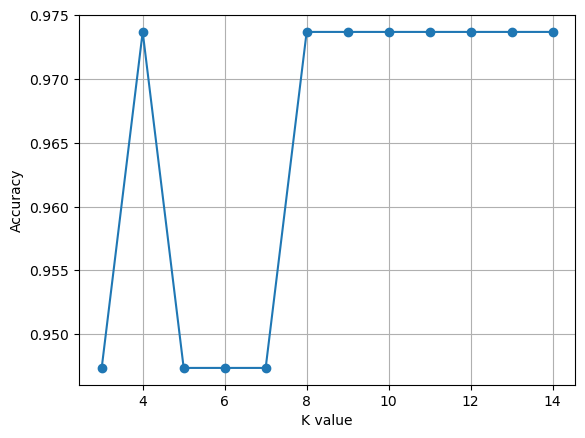

In [53]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.grid()

In [55]:
classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'euclidean')
classifier.fit(x_train,y_train)
y_predictions = classifier.predict(x_test)

In [57]:
print('Accuracy is :',accuracy_score(y_test,y_predictions))
print('Precision is :',precision_score(y_test,y_predictions,average='macro'))
print('Recall is :',recall_score(y_test,y_predictions,average='macro'))
print('F1 Score is :',f1_score(y_test,y_predictions,average='macro'))

Accuracy is : 0.9473684210526315
Precision is : 0.9440559440559442
Recall is : 0.9474747474747475
F1 Score is : 0.9448693834900732


In [59]:
confusion_matrix(y_test,y_pred)

array([[14,  1,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

### Naive Bayes

In [61]:
from sklearn.naive_bayes import GaussianNB

In [63]:
nb_classifier = GaussianNB()
nb_classifier.fit(x_train,y_train)

GaussianNB()

In [94]:
y_pred_nb_classifier = nb_classifier.predict(x_test)

In [96]:
print('Accuracy is :',accuracy_score(y_test,y_pred_nb_classifier))
print('Precision is :',precision_score(y_test,y_pred_nb_classifier,average='macro'))
print('Recall is :',recall_score(y_test,y_pred_nb_classifier,average='macro'))
print('F1 Score is :',f1_score(y_test,y_pred_nb_classifier,average='macro'))

Accuracy is : 1.0
Precision is : 1.0
Recall is : 1.0
F1 Score is : 1.0


In [98]:
confusion_matrix(y_test,y_pred_nb_classifier)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

### SVM

In [76]:
from sklearn.svm import SVC

In [78]:
svm_cls=SVC(kernel='linear')
svm_cls=svm_cls.fit(x_train,y_train)

In [103]:
y_pred_svm=svm_cls.predict(x_test)

In [105]:
print('Accuracy is :',accuracy_score(y_test,y_pred_svm))
print('Precision is :',precision_score(y_test,y_pred_svm,average='macro'))
print('Recall is :',recall_score(y_test,y_pred_svm,average='macro'))
print('F1 Score is :',f1_score(y_test,y_pred_svm,average='macro'))

Accuracy is : 1.0
Precision is : 1.0
Recall is : 1.0
F1 Score is : 1.0


In [107]:
confusion_matrix(y_test,y_pred_svm)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

### Decision Tree

In [101]:
from sklearn.tree import DecisionTreeClassifier
dt_cls=DecisionTreeClassifier()
dt_cls=dt_cls.fit(x_train,y_train)
y_pred_dt=dt_cls.predict(x_test)

In [109]:
print('Accuracy is :',accuracy_score(y_test,y_pred_dt))
print('Precision is :',precision_score(y_test,y_pred_dt,average='macro'))
print('Recall is :',recall_score(y_test,y_pred_dt,average='macro'))
print('F1 Score is :',f1_score(y_test,y_pred_dt,average='macro'))

Accuracy is : 1.0
Precision is : 1.0
Recall is : 1.0
F1 Score is : 1.0


In [111]:
confusion_matrix(y_test,y_pred_dt)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

### Random Forest

In [114]:
from sklearn.ensemble import RandomForestClassifier
rf_cls=RandomForestClassifier()
rf_cls=rf_cls.fit(x_train,y_train)
y_pred_rf=rf_cls.predict(x_test)

In [116]:
print('Accuracy is :',accuracy_score(y_test,y_pred_rf))
print('Precision is :',precision_score(y_test,y_pred_rf,average='macro'))
print('Recall is :',recall_score(y_test,y_pred_rf,average='macro'))
print('F1 Score is :',f1_score(y_test,y_pred_rf,average='macro'))

Accuracy is : 1.0
Precision is : 1.0
Recall is : 1.0
F1 Score is : 1.0


In [118]:
confusion_matrix(y_test,y_pred_rf)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)